### Установка scikit-learn

In [ ]:
# !pip3 install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 3.3 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 1.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip


### Загрузка пакетов

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датафрейма

In [6]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df.columns)

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### Разделим переменные на целевую и независимые

In [12]:
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values
print(X)

[[128   1]
 [107   1]
 [137   0]
 ...
 [ 28   2]
 [184   2]
 [ 74   0]]


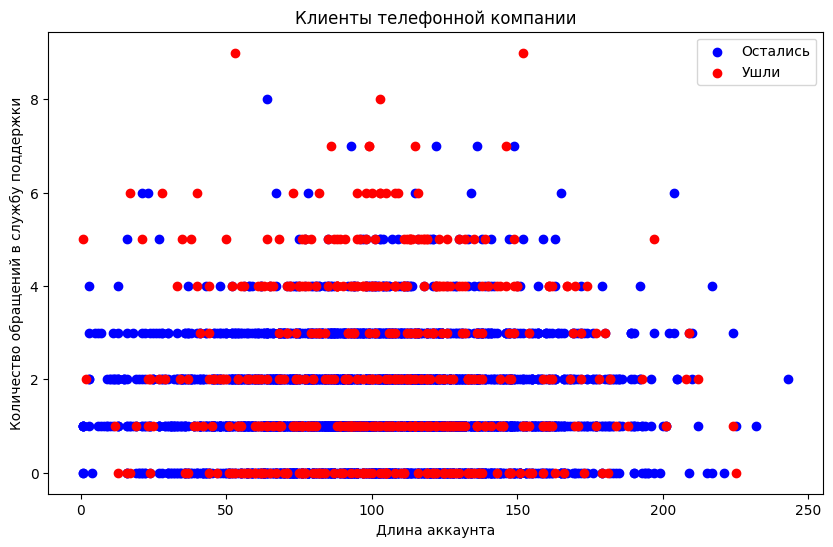

In [38]:
X = churn_df[['account_length', 'customer_service_calls']]
Y = churn_df['churn']
# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0]['account_length'], X[Y == 0]['customer_service_calls'], color='blue', label='Остались')
plt.scatter(X[Y == 1]['account_length'], X[Y == 1]['customer_service_calls'], color='red', label='Ушли')
plt.xlabel('Длина аккаунта')
plt.ylabel('Количество обращений в службу поддержки')
plt.title('Клиенты телефонной компании')
plt.legend()
plt.show()

### Построение классификатора

In [13]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### Создание набора для предсказания

In [39]:
X_new = np.array([
    [30, 17],
    [107, 24],
    [213, 10]
])

### Предсказание

In [40]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0]


### Разбитие данных

In [41]:
from sklearn.model_selection import train_test_split
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

### Обучение и предсказание

In [42]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8590704647676162
